## Order Analysis Project

Important steps taken during the project:
1. Data downloaded from Kaggle
2. Unzipped the data
3. Created some necessary columns
4. Built a connection with the SQL server to get data from Pandas data frame into SQL.
5. Project analysis done both in Python and in SQL server. 

The idea behind this project is that the company would like to make some data-driven decisions based on the analysis of a few questions that it had in mind. 

1. List all the distinct cities where orders have been shipped
2. Calculate the total selling price and profits for all orders
3. Finding all orders from the 'Technology' that were shipped using 'second class' ship mode, ordered by order date
4. Finding the average order value
5. Finding the city with the highest total quantity of products ordered
6. Rank Orders in each region by quantity in descending order
7. List the total value for the orders placed in the first quarter of any year.
8. Top 10 highest Profit Generating Products
9. Top n products according to revenue/sales
10. Finding top 3 highest selling products in each region according to quantity
11. Total sales in each region
12. Finding month over month growth comparison for 2022 and 2023 sales (Jan 2022 vs Jan 2023)
13. For each category which month has the highest sale

### 1. Install Kaggle Library

In [1]:
!pip install kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/82.7 kB 660.6 kB/s eta 0:00:01
     -------------------------------------  81.9/82.7 kB 919.0 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 770.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105796 sha256=c7a696b4ce1e2c334d95c55b6d94bece40f2e4e22879ae5768be09f3609fced6
  Stored in directory: c:\users\saurabh kamal\appdata\local\pip\cache\wheels\ff\55\fb\b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Saurabh Kamal\Program Files\anaconda3\python.exe -m pip install --upgrade pip


In [2]:
!kaggle datasets download akshatagrawal9431/shipment-orders-dataset -f orders_data.csv

Dataset URL: https://www.kaggle.com/datasets/akshatagrawal9431/shipment-orders-dataset
License(s): CC0-1.0




  0%|          | 0.00/197k [00:00<?, ?B/s]
100%|##########| 197k/197k [00:00<00:00, 626kB/s]
100%|##########| 197k/197k [00:00<00:00, 626kB/s]


### 2. Extract file from zip file

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('orders_data.csv.zip')
zip_ref.extractall() # extract file to dir

# unzipping the file -> so that the data is extracted then we'll import it.
zip_ref.close() # close file

In [5]:
import pandas as pd

In [1]:
df = pd.read_csv('orders_data.csv')
df.head()

<IPython.core.display.Javascript object>

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


#### There are no blank values in the dataset.

In [3]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5962
Second Class      1945
First Class       1538
Same Day           543
Not Available        4
unknown              1
Name: count, dtype: int64

In [4]:
df['Ship Mode'].nunique()

6

In [5]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', nan, 'Same Day'], dtype=object)

In [6]:
df1 = pd.read_csv('orders_data.csv', na_values = ['Not Available', 'unknown'])
df1['Ship Mode'].unique()

<IPython.core.display.Javascript object>

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [7]:
df1['Ship Mode'].value_counts()

Ship Mode
Standard Class    5962
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [8]:
df1['Ship Mode'].nunique()

4

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9988 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


### 3. Derive New Columns discount, sale price, and profit

In [10]:
df1.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [11]:
df1['Selling_Price'] = df1['List Price'] - df1['List Price']*(df1['Discount Percent']/100)
df1['Selling_Price']

0       254.8
1       708.1
2         9.5
3       940.8
4        19.0
        ...  
9989     28.8
9990     86.4
9991    254.8
9992     29.1
9993    232.8
Name: Selling_Price, Length: 9994, dtype: float64

In [12]:
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Selling_Price
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1


In [13]:
df1['Profit'] = df1['Selling_Price'] - df1['cost price']
df1['Profit']

0        14.8
1       108.1
2        -0.5
3       160.8
4        -1.0
        ...  
9989     -1.2
9990     16.4
9991     34.8
9992     -0.9
9993     22.8
Name: Profit, Length: 9994, dtype: float64

In [14]:
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Selling_Price,Profit
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8,14.8
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1,108.1


In [15]:
df1.rename(columns={'Profit':'Unit_Profit', 'Selling_Price':'Unit_Selling_Price'}, inplace=True)
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8,14.8
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1,108.1


In [16]:
df1.dtypes

Order Id                int64
Order Date             object
Ship Mode              object
Segment                object
Country                object
City                   object
State                  object
Postal Code             int64
Region                 object
Category               object
Sub Category           object
Product Id             object
cost price              int64
List Price              int64
Quantity                int64
Discount Percent        int64
Unit_Selling_Price    float64
Unit_Profit           float64
dtype: object

### 4. Changing datatype of Order Date Column from object to datetime

In [17]:
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8,14.8
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1,108.1


In [18]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'], format='%d-%m-%Y')

<IPython.core.display.Javascript object>

In [19]:
df1.dtypes

Order Id                       int64
Order Date            datetime64[ns]
Ship Mode                     object
Segment                       object
Country                       object
City                          object
State                         object
Postal Code                    int64
Region                        object
Category                      object
Sub Category                  object
Product Id                    object
cost price                     int64
List Price                     int64
Quantity                       int64
Discount Percent               int64
Unit_Selling_Price           float64
Unit_Profit                  float64
dtype: object

In [20]:
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1,108.1


In [21]:
# Calculating total profit in each order
df1['Total Profit'] = df1['Quantity'] * df1['Unit_Profit']
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8,14.8,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1,108.1,324.3


### 5. Building SQL connection to get data from Pandas dataframe into SQL

In [38]:
import sqlalchemy as sal

In [37]:
import pyodbc

print(pyodbc.drivers())


['SQL Server', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)']


In [39]:
engine = sal.create_engine('mssql://ROKKO_THE_GAMER/Project?driver=ODBC+Driver+17+FOR+SQL+Server')

In [40]:
conn = engine.connect()
conn

In [41]:
df1.to_sql('orders_data', con=conn, index=False, if_exists = 'replace') # or iif_exists = 'append'

94

Going to SQL server to check if orders_data table is running. 

This how to export data from python to pandas to SQL server.

### 6. Data Analysis 
#### 1. Finding the top 10 highest profit generating products. 

In [69]:
df1.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale,Month,Quarter,year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,260,2,2,254.8,14.8,29.6,509.6,3,1,2023
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,730,3,3,708.1,108.1,324.3,2124.3,8,3,2023
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,10,2,5,9.5,-0.5,-1.0,19.0,1,1,2023
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,...,960,5,2,940.8,160.8,804.0,4704.0,6,2,2022
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,...,20,2,5,19.0,-1.0,-2.0,38.0,7,3,2022


In [70]:
df1.groupby('Product Id')


In [71]:
df1.groupby('Product Id').sum(['Total Profit'])

,Order Id,Postal Code,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale,Month,Quarter,year
Product Id,,,,,,,,,,,,,
FUR-BO-10000112,3513,60653,760,830,9,3,805.1,45.1,405.9,7245.9,4,2,2023
FUR-BO-10000330,13658,256733,890,1060,10,7,1036.4,146.4,560.0,3680.0,20,7,6066
FUR-BO-10000362,18886,184360,1900,2160,14,17,2089.4,189.4,638.6,8388.6,20,9,10113
FUR-BO-10000468,35749,357215,620,730,21,18,706.1,86.1,380.6,2670.6,40,15,12135
FUR-BO-10000711,9310,120635,790,850,12,5,830.9,40.9,345.9,6255.9,11,5,4045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEC-PH-10004912,21739,166396,440,510,11,9,493.8,53.8,203.8,1903.8,19,7,6066
TEC-PH-10004922,31470,296048,980,1080,19,21,1037.3,57.3,259.2,4439.2,32,12,10113
TEC-PH-10004924,13937,105326,50,50,8,10,48.2,-1.8,-6.0,154.0,18,7,6068


In [72]:
# Sorting
df1.groupby('Product Id').sum(['Total Profit']).sort_values(by=['Total Profit'], ascending=False) 

,Order Id,Postal Code,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale,Month,Quarter,year
Product Id,,,,,,,,,,,,,
TEC-CO-10004722,28222,194875,53870,61600,20,17,59514.0,5644.0,24816.0,245056.0,39,15,10112
TEC-MA-10002412,2698,32216,18110,22640,6,4,21734.4,3624.4,21746.4,130406.4,10,4,2023
OFF-BI-10000545,57937,302599,16290,19030,48,31,18249.0,1959.0,17867.7,163777.7,43,17,18204
TEC-CO-10001449,41444,428939,15520,18840,38,29,18151.2,2631.2,15948.0,107388.0,81,30,16181
FUR-CH-10002024,44560,448062,18850,21860,39,27,21096.2,2246.2,13930.7,120090.7,61,23,16179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
OFF-BI-10003712,46354,562879,130,130,45,38,124.7,-5.3,-35.7,774.3,62,23,22247
OFF-AR-10003631,20973,277819,110,110,30,13,106.4,-3.6,-37.0,1033.0,33,13,8090
OFF-PA-10000143,38761,389204,160,160,29,22,153.8,-6.2,-39.5,930.5,22,10,12135


In [73]:
# Product Id is the index of the dataframe. Reset the index so that Product ID becomes actual column

df1.groupby('Product Id').sum(['Total Profit']).sort_values(by=['Total Profit'], ascending=False).reset_index()

,Product Id,Order Id,Postal Code,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale,Month,Quarter,year
0,TEC-CO-10004722,28222,194875,53870,61600,20,17,59514.0,5644.0,24816.0,245056.0,39,15,10112
1,TEC-MA-10002412,2698,32216,18110,22640,6,4,21734.4,3624.4,21746.4,130406.4,10,4,2023
2,OFF-BI-10000545,57937,302599,16290,19030,48,31,18249.0,1959.0,17867.7,163777.7,43,17,18204
3,TEC-CO-10001449,41444,428939,15520,18840,38,29,18151.2,2631.2,15948.0,107388.0,81,30,16181
4,FUR-CH-10002024,44560,448062,18850,21860,39,27,21096.2,2246.2,13930.7,120090.7,61,23,16179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,OFF-BI-10003712,46354,562879,130,130,45,38,124.7,-5.3,-35.7,774.3,62,23,22247
1858,OFF-AR-10003631,20973,277819,110,110,30,13,106.4,-3.6,-37.0,1033.0,33,13,8090
1859,OFF-PA-10000143,38761,389204,160,160,29,22,153.8,-6.2,-39.5,930.5,22,10,12135
1860,OFF-BI-10002799,32515,368281,120,120,40,32,114.2,-5.8,-44.5,875.5,45,17,14159


In [74]:

df1.groupby('Product Id').sum(['Total Profit']).sort_values(by=['Total Profit'], ascending=False).reset_index()['Total Profit'].head()

0    24816.0
1    21746.4
2    17867.7
3    15948.0
4    13930.7
Name: Total Profit, dtype: float64

In [77]:

top_ten_profit = df1.groupby('Product Id').sum(['Total Profit']).sort_values(by=['Total Profit'], ascending=False).reset_index()[['Product Id','Total Profit']].head(10)
top_ten_profit

,Product Id,Total Profit
0,TEC-CO-10004722,24816.0
1,TEC-MA-10002412,21746.4
2,OFF-BI-10000545,17867.7
3,TEC-CO-10001449,15948.0
4,FUR-CH-10002024,13930.7
5,OFF-BI-10003527,12792.9
6,TEC-PH-10001459,11481.9
7,TEC-MA-10000822,10102.3
8,FUR-TA-10000198,10015.1
9,TEC-MA-10001047,9989.0


C:\Users\Saurabh Kamal\AppData\Local\Temp\ipykernel_31328\1325171092.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_ten_profit["Product Id"], rotation=90)


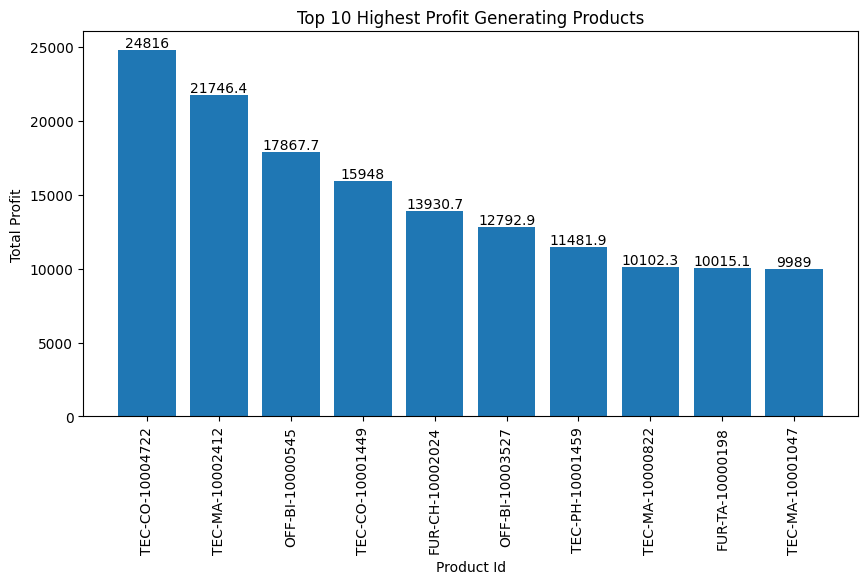

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches([10, 5])
ax.bar(top_ten_profit["Product Id"], top_ten_profit["Total Profit"])
ax.set_xticklabels(top_ten_profit["Product Id"], rotation=90)
ax.set_ylabel("Total Profit")
ax.set_xlabel("Product Id")
ax.bar_label(ax.containers[0])
plt.title("Top 10 Highest Profit Generating Products")
plt.show()

These are the top 10 products with the highest profit. These are the products which are giving advantage to the company.

In [79]:

highest_quantity = df1.groupby('Product Id').sum(['Total Profit']).sort_values(by=['Quantity'], ascending=False).reset_index()[['Product Id','Quantity']].head(10)
highest_quantity

,Product Id,Quantity
0,TEC-AC-10003832,75
1,OFF-PA-10001970,70
2,OFF-BI-10001524,67
3,FUR-CH-10002647,64
4,OFF-BI-10002026,64
5,FUR-TA-10001095,61
6,TEC-AC-10002049,60
7,OFF-BI-10004728,59
8,FUR-CH-10003774,59
9,TEC-AC-10003038,57


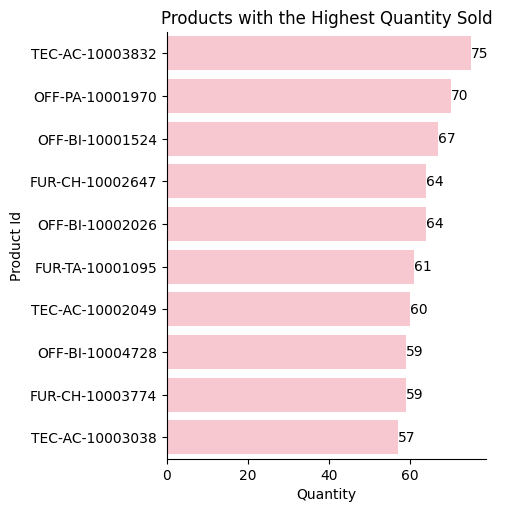

In [99]:
import seaborn as sns

g = sns.catplot(x = "Quantity", y = "Product Id", data = highest_quantity, kind = "bar", color = "pink")

# Access the Axes object
ax = g.ax

ax.bar_label(ax.containers[0])
plt.title("Products with the Highest Quantity Sold")
plt.show()



These are the top 10 products with the highest quantity.

### Create a column for total sales value of each other.

In [31]:
df1.head(2)


,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8,14.8,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1,108.1,324.3


In [32]:
df1['Total_Sale'] = df1['Unit_Selling_Price']*df1['Quantity']
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8,14.8,29.6,509.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1,108.1,324.3,2124.3


- Total Sale Value of FUR-BO-10001798 is USD 509.6
- Total Sale Value of FUR-CH-10000454	 is USD 2124.3


#### 2. List all the distinct cities where orders have been shipped.

Company wants to know in which city they can expand its business. So, for this purpose it is important to understand the different cities where the orders have been actually shipped. 

In [33]:
df1['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [34]:
df1['City'].nunique()

531

#### 3. Finding all orders from the 'Technology' category that were shipped using 'Second Class' ship mode, ordered by order date. 

In [35]:
df1[df1['Category'] == 'Technology']

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5,864.5,4.5,27.0,5187.0
11,12,2023-12-25,NaN,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002033,750,910,4,3,882.7,132.7,530.8,3530.8
19,20,2022-01-11,Second Class,Consumer,United States,San Francisco,California,94109,West,Technology,Phones,TEC-PH-10001949,170,210,3,3,203.7,33.7,101.1,611.1
26,27,2022-02-08,Second Class,Consumer,United States,Los Angeles,California,90049,West,Technology,Accessories,TEC-AC-10003027,80,90,3,3,87.3,7.3,21.9,261.9
35,36,2022-10-30,First Class,Corporate,United States,Richardson,Texas,75080,Central,Technology,Phones,TEC-PH-10004977,1020,1100,7,5,1045.0,25.0,175.0,7315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984,2022-09-14,Standard Class,Consumer,United States,Grand Rapids,Michigan,49505,Central,Technology,Phones,TEC-PH-10001305,80,100,2,4,96.0,16.0,32.0,192.0
9986,9987,2022-11-30,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,TEC-AC-10003399,40,40,1,5,38.0,-2.0,-2.0,38.0
9987,9988,2023-04-01,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,TEC-AC-10001539,80,80,1,3,77.6,-2.4,-2.4,77.6
9988,9989,2022-11-17,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,TEC-PH-10004006,180,210,5,5,199.5,19.5,97.5,997.5


In [36]:
df1[(df1['Category'] == 'Technology') & (df1['Ship Mode'] == 'Second Class')]


,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale
19,20,2022-01-11,Second Class,Consumer,United States,San Francisco,California,94109,West,Technology,Phones,TEC-PH-10001949,170,210,3,3,203.7,33.7,101.1,611.1
26,27,2022-02-08,Second Class,Consumer,United States,Los Angeles,California,90049,West,Technology,Accessories,TEC-AC-10003027,80,90,3,3,87.3,7.3,21.9,261.9
161,162,2023-11-27,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19134,East,Technology,Accessories,TEC-AC-10003657,40,50,2,5,47.5,7.5,15.0,95.0
181,182,2022-06-25,Second Class,Corporate,United States,Decatur,Illinois,62521,Central,Technology,Accessories,TEC-AC-10004659,380,410,7,3,397.7,17.7,123.9,2783.9
182,183,2022-01-10,Second Class,Home Office,United States,Monroe,Louisiana,71203,South,Technology,Phones,TEC-PH-10003273,470,500,4,5,475.0,5.0,20.0,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9891,9892,2023-05-21,Second Class,Corporate,United States,Milwaukee,Wisconsin,53209,Central,Technology,Accessories,TEC-AC-10003116,110,120,7,3,116.4,6.4,44.8,814.8
9892,9893,2023-01-02,Second Class,Corporate,United States,Milwaukee,Wisconsin,53209,Central,Technology,Phones,TEC-PH-10002262,260,300,5,3,291.0,31.0,155.0,1455.0
9949,9950,2022-01-07,Second Class,Corporate,United States,Indianapolis,Indiana,46203,Central,Technology,Accessories,TEC-AC-10004568,70,80,3,3,77.6,7.6,22.8,232.8
9950,9951,2022-03-19,Second Class,Corporate,United States,Indianapolis,Indiana,46203,Central,Technology,Accessories,TEC-AC-10001714,40,40,1,3,38.8,-1.2,-1.2,38.8


#### 4. Finding the average order value

It will give the overall picture of the company

In [37]:
import numpy as np
avg_order_value = round(np.mean(df1['Total_Sale']),2)
avg_order_value

1108.6

#### 5. Finding the city with the highest total quantity of products ordered.

In [38]:
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8,14.8,29.6,509.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1,108.1,324.3,2124.3


In [39]:
df1.groupby('City').sum('Quantity')

,Order Id,Postal Code,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale
City,,,,,,,,,,
Aberdeen,9261,57401,30,30,3,4,28.8,-1.2,-3.6,86.4
Abilene,6990,79605,0,0,2,4,0.0,0.0,0.0,0.0
Akron,97234,930552,2360,2730,65,69,2650.9,290.9,708.3,7018.3
Albuquerque,67175,1219470,1950,2220,65,41,2158.1,208.1,1122.9,11382.9
Alexandria,47898,356864,4970,5510,84,54,5264.8,294.8,1911.2,29811.2
...,...,...,...,...,...,...,...,...,...,...
Woonsocket,19448,11580,190,200,15,12,194.0,4.0,43.5,723.5
Yonkers,74122,160515,6760,7650,57,45,7326.5,566.5,3454.7,47084.7
York,23392,87015,730,820,19,16,790.9,60.9,281.0,3111.0


In [40]:
# Extracting only quantity as rest of the columns are not useful
df1.groupby('City').sum('Quantity')['Quantity'].reset_index().sort_values(by = ['Quantity'], ascending = False)

,City,Quantity
329,New York City,3417
266,Los Angeles,2879
374,Philadelphia,1981
438,San Francisco,1935
452,Seattle,1590
...,...,...
213,Iowa City,1
386,Port Orange,1
257,Lindenhurst,1
259,Littleton,1


In [100]:
# Top 5 cities with highest total quantity
top_cities = df1.groupby('City').sum('Quantity')['Quantity'].reset_index().sort_values(by = ['Quantity'], ascending = False).head()
top_cities

,City,Quantity
329,New York City,3417
266,Los Angeles,2879
374,Philadelphia,1981
438,San Francisco,1935
452,Seattle,1590


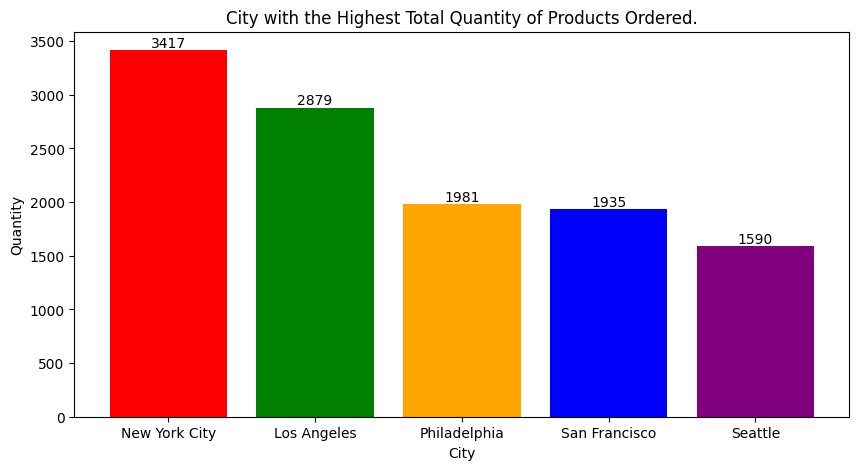

In [111]:
fig, ax = plt.subplots()
fig.set_size_inches([10, 5])
colors = ["red", "green", "orange", "blue", "purple"]
ax.bar(top_cities["City"], top_cities["Quantity"], color=colors)
#ax.set_xticklabels(top_cities["City"], rotation=90)
ax.set_ylabel("Quantity")
ax.set_xlabel("City")
ax.bar_label(ax.containers[0])
plt.title("City with the Highest Total Quantity of Products Ordered.")
plt.show()

New York City has the highest number of orders followed by LA, Philadelphia, San Francisco and so on.

#### 6. Rank Orders in each region by quantity in descending order.

In [42]:
df1[['Order Id', 'Region', 'Quantity']].sort_values(by = ['Region', 'Quantity'], ascending = [True, False])

,Order Id,Region,Quantity
660,661,Central,14
1045,1046,Central,14
7387,7388,Central,14
8074,8075,Central,14
9515,9516,Central,14
...,...,...,...
9752,9753,West,1
9838,9839,West,1
9902,9903,West,1
9953,9954,West,1


In [43]:
import pandas as pd

# Assuming df1 is your DataFrame
sorted_df = df1[['Order Id', 'Region', 'Quantity']].sort_values(by=['Region', 'Quantity'], ascending=[True, False])

# Add the Rank column, grouped by 'Region'
sorted_df['Rank'] = sorted_df.groupby('Region')['Quantity'].rank(ascending=False, method='dense')

print(sorted_df)


      Order Id   Region  Quantity  Rank
660        661  Central        14   1.0
1045      1046  Central        14   1.0
7387      7388  Central        14   1.0
8074      8075  Central        14   1.0
9515      9516  Central        14   1.0
...        ...      ...       ...   ...
9752      9753     West         1  14.0
9838      9839     West         1  14.0
9902      9903     West         1  14.0
9953      9954     West         1  14.0
9986      9987     West         1  14.0

[9994 rows x 4 columns]


In [44]:
sorted_df['Rank'] = sorted_df['Rank'].astype(int)

In [45]:
sorted_df.dtypes

Order Id     int64
Region      object
Quantity     int64
Rank         int32
dtype: object

In [46]:
sorted_df.head(20)

,Order Id,Region,Quantity,Rank
660,661,Central,14,1
1045,1046,Central,14,1
7387,7388,Central,14,1
8074,8075,Central,14,1
9515,9516,Central,14,1
3242,3243,Central,13,2
9039,9040,Central,13,2
9063,9064,Central,13,2
1108,1109,Central,12,3
6158,6159,Central,12,3


#### 7. List all orders placed in the first quarter of any year (January to March), including the total sale for these orders.

In [47]:
df1['Order Date'].dt.month

0        3
1        8
2        1
3        6
4        7
        ..
9989     2
9990     3
9991     8
9992    11
9993     7
Name: Order Date, Length: 9994, dtype: int32

In [48]:
df1['Month'] = df1['Order Date'].dt.month
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale,Month
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-BO-10001798,240,260,2,2,254.8,14.8,29.6,509.6,3
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-CH-10000454,600,730,3,3,708.1,108.1,324.3,2124.3,8


In [49]:
df1[df1['Month'].isin([1,2,3])]

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale,Month
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-BO-10001798,240,260,2,2,254.8,14.8,29.6,509.6,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,OFF-LA-10000240,10,10,2,5,9.5,-0.5,-1.0,19.0,1
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,...,FUR-FU-10001487,50,50,7,3,48.5,-1.5,-10.5,339.5,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,...,TEC-PH-10002275,860,910,6,5,864.5,4.5,27.0,5187.0,1
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,...,OFF-BI-10003910,20,20,3,2,19.6,-0.4,-1.2,58.8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,9964,2022-01-17,Same Day,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,...,OFF-PA-10003072,10,10,2,3,9.7,-0.3,-0.6,19.4,1
9966,9967,2022-02-21,Second Class,Corporate,United States,Newark,Delaware,19711,East,Office Supplies,...,OFF-EN-10004483,100,110,7,4,105.6,5.6,39.2,739.2,2
9973,9974,2023-03-07,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Technology,...,TEC-PH-10004080,230,270,5,4,259.2,29.2,146.0,1296.0,3
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,...,FUR-FU-10001889,30,30,3,4,28.8,-1.2,-3.6,86.4,2


In [50]:
# Alternative
df1['Quarter'] = df1['Order Date'].dt.quarter
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale,Month,Quarter
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,240,260,2,2,254.8,14.8,29.6,509.6,3,1
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,600,730,3,3,708.1,108.1,324.3,2124.3,8,3


In [51]:
df1

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale,Month,Quarter
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,240,260,2,2,254.8,14.8,29.6,509.6,3,1
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,600,730,3,3,708.1,108.1,324.3,2124.3,8,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,10,10,2,5,9.5,-0.5,-1.0,19.0,1,1
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,...,780,960,5,2,940.8,160.8,804.0,4704.0,6,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,...,20,20,2,5,19.0,-1.0,-2.0,38.0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,...,30,30,3,4,28.8,-1.2,-3.6,86.4,2,1
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,...,70,90,2,4,86.4,16.4,32.8,172.8,3,1
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,...,220,260,2,2,254.8,34.8,69.6,509.6,8,3
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,...,30,30,4,3,29.1,-0.9,-3.6,116.4,11,4


In [52]:
df1[df1['Quarter'] == 1]

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale,Month,Quarter
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,240,260,2,2,254.8,14.8,29.6,509.6,3,1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,10,10,2,5,9.5,-0.5,-1.0,19.0,1,1
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,...,50,50,7,3,48.5,-1.5,-10.5,339.5,3,1
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,...,860,910,6,5,864.5,4.5,27.0,5187.0,1,1
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,...,20,20,3,2,19.6,-0.4,-1.2,58.8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,9964,2022-01-17,Same Day,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,...,10,10,2,3,9.7,-0.3,-0.6,19.4,1,1
9966,9967,2022-02-21,Second Class,Corporate,United States,Newark,Delaware,19711,East,Office Supplies,...,100,110,7,4,105.6,5.6,39.2,739.2,2,1
9973,9974,2023-03-07,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Technology,...,230,270,5,4,259.2,29.2,146.0,1296.0,3,1
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,...,30,30,3,4,28.8,-1.2,-3.6,86.4,2,1


In [53]:
# Sum of total where the quarter value is 1
df1[df1['Order Date'].dt.month.isin([1,2,3])] #Jan,feb,mar

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale,Month,Quarter
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,240,260,2,2,254.8,14.8,29.6,509.6,3,1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,10,10,2,5,9.5,-0.5,-1.0,19.0,1,1
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,...,50,50,7,3,48.5,-1.5,-10.5,339.5,3,1
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,...,860,910,6,5,864.5,4.5,27.0,5187.0,1,1
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,...,20,20,3,2,19.6,-0.4,-1.2,58.8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,9964,2022-01-17,Same Day,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,...,10,10,2,3,9.7,-0.3,-0.6,19.4,1,1
9966,9967,2022-02-21,Second Class,Corporate,United States,Newark,Delaware,19711,East,Office Supplies,...,100,110,7,4,105.6,5.6,39.2,739.2,2,1
9973,9974,2023-03-07,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Technology,...,230,270,5,4,259.2,29.2,146.0,1296.0,3,1
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,...,30,30,3,4,28.8,-1.2,-3.6,86.4,2,1


In [54]:
df1['year'] = df1['Order Date'].dt.year
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale,Month,Quarter,year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,260,2,2,254.8,14.8,29.6,509.6,3,1,2023
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,730,3,3,708.1,108.1,324.3,2124.3,8,3,2023


In [55]:
# Yearly quarterly sale
temp_df = df1.groupby(['year','Quarter']).sum('Total_Sale')['Total_Sale'].reset_index()
temp_df

,year,Quarter,Total_Sale
0,2022,1,1275547.6
1,2022,2,1355326.7
2,2022,3,1343727.8
3,2022,4,1500939.2
4,2023,1,1559456.2
5,2023,2,1282878.4
6,2023,3,1308164.5
7,2023,4,1453287.8


In [56]:
temp_df[temp_df['Quarter'] == 1]

,year,Quarter,Total_Sale
0,2022,1,1275547.6
4,2023,1,1559456.2


This is the total sales of quarter 1 per year

In [57]:
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale,Month,Quarter,year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,260,2,2,254.8,14.8,29.6,509.6,3,1,2023
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,730,3,3,708.1,108.1,324.3,2124.3,8,3,2023


In [58]:
# Total number of orders placed in each quarter
temp_df_order = df1.groupby(['year','Quarter']).sum('Quantity')['Quantity'].reset_index()
temp_df_order

,year,Quarter,Quantity
0,2022,1,4608
1,2022,2,4815
2,2022,3,4756
3,2022,4,4897
4,2023,1,4768
5,2023,2,4484
6,2023,3,4767
7,2023,4,4778


In [59]:
temp_df_order[temp_df_order['Quarter'] == 1]

,year,Quarter,Quantity
0,2022,1,4608
4,2023,1,4768


#### 8. Finding top 10 highest profit generating products

In [112]:
df1.groupby('Product Id').sum(['Total Profit'])['Total Profit'].reset_index().sort_values(by='Total Profit', ascending = False).head(10)

,Product Id,Total Profit
1614,TEC-CO-10004722,24816.0
1642,TEC-MA-10002412,21746.4
657,OFF-BI-10000545,17867.7
1604,TEC-CO-10001449,15948.0
80,FUR-CH-10002024,13930.7
776,OFF-BI-10003527,12792.9
1724,TEC-PH-10001459,11481.9
1624,TEC-MA-10000822,10102.3
318,FUR-TA-10000198,10015.1
1630,TEC-MA-10001047,9989.0


#### 9. Finding top 3 highest selling products in each region according to quantity

In [61]:
df1.groupby(['Region', 'Product Id']).sum('Quantity')

Order Id  Postal Code  cost price  List Price  \
Region  Product Id                                                       
Central FUR-BO-10000112      3513        60653         760         830   
        FUR-BO-10000362      1595        61604         300         360   
        FUR-BO-10000468      3031        48146         150         190   
        FUR-BO-10000711      5221        48234         200         210   
        FUR-BO-10000780     16297       229596        1980        2330   
...                           ...          ...         ...         ...   
West    TEC-PH-10004896      1088        94601          60          70   
        TEC-PH-10004897      4320        87105          20          20   
        TEC-PH-10004908     38344       421143        1310        1500   
        TEC-PH-10004922     11121       180757         420         480   
        TEC-PH-10004977     11216       262951        1410        1570   

                         Quantity  Discount Percent  Unit_Selling_Price  \
Region  Product Id                                                        
Central FUR-BO-10000112         9                 3               805.1   
        FUR-BO-10000362         3                 3               349.2   
        FUR-BO-10000468         4                 5               180.5   
        FUR-BO-10000711         3                 3               203.7   
        FUR-BO-10000780        17                14              2223.1   
...                           ...               ...                 ...   
West    TEC-PH-10004896         3                 2                68.6   
        TEC-PH-10004897         3                 4                19.2   
        TEC-PH-10004908        22                22              1433.2   
        TEC-PH-10004922         9                 9               459.2   
        TEC-PH-10004977        10                13              1500.9   

                         Unit_Profit  Total Profit  Total_Sale  Month  \
Region  Product Id                                                      
Central FUR-BO-10000112         45.1         405.9      7245.9      4   
        FUR-BO-10000362         49.2         147.6      1047.6      1   
        FUR-BO-10000468         30.5         122.0       722.0      9   
        FUR-BO-10000711          3.7          11.1       611.1      7   
        FUR-BO-10000780        243.1        1503.7     14003.7     16   
...                              ...           ...         ...    ...   
West    TEC-PH-10004896          8.6          25.8       205.8      1   
        TEC-PH-10004897         -0.8          -2.4        57.6     12   
        TEC-PH-10004908        123.2         680.4      7300.4     25   
        TEC-PH-10004922         39.2         199.2      2299.2     17   
        TEC-PH-10004977         90.9         311.2      5101.2     19   

                         Quarter   year  
Region  Product Id                       
Central FUR-BO-10000112        2   2023  
        FUR-BO-10000362        1   2022  
        FUR-BO-10000468        3   2022  
        FUR-BO-10000711        3   2023  
        FUR-BO-10000780        6   6068  
...                          ...    ...  
West    TEC-PH-10004896        1   2022  
        TEC-PH-10004897        4   2023  
        TEC-PH-10004908       10  10114  
        TEC-PH-10004922        6   4044  
        TEC-PH-10004977        8   6067  

[5298 rows x 13 columns]

In [62]:
df1.groupby(['Region', 'Product Id']).sum('Quantity')['Quantity']

Region   Product Id     
Central  FUR-BO-10000112     9
         FUR-BO-10000362     3
         FUR-BO-10000468     4
         FUR-BO-10000711     3
         FUR-BO-10000780    17
                            ..
West     TEC-PH-10004896     3
         TEC-PH-10004897     3
         TEC-PH-10004908    22
         TEC-PH-10004922     9
         TEC-PH-10004977    10
Name: Quantity, Length: 5298, dtype: int64

In [66]:
grouped_df = df1.groupby(['Region','Product Id']).sum('Quantity')['Quantity'].reset_index().sort_values(by=['Region','Quantity'], ascending = [True, False])
grouped_df['Rank'] = grouped_df.groupby('Region')['Quantity'].rank(ascending=False, method = 'dense')



In [67]:
grouped_df['Rank'] = grouped_df['Rank'].astype(int) 

In [68]:
top_3_products_per_region = grouped_df[grouped_df['Rank'] <= 3]

top_3_products_per_region

,Region,Product Id,Quantity,Rank
461,Central,OFF-BI-10000301,34,1
474,Central,OFF-BI-10000756,33,2
470,Central,OFF-BI-10000546,29,3
491,Central,OFF-BI-10001249,29,3
2190,East,OFF-PA-10001970,33,1
1914,East,OFF-BI-10003656,32,2
1549,East,FUR-FU-10004848,31,3
2018,East,OFF-FA-10000621,31,3
3560,South,OFF-ST-10003716,26,1
2757,South,FUR-CH-10000513,24,2


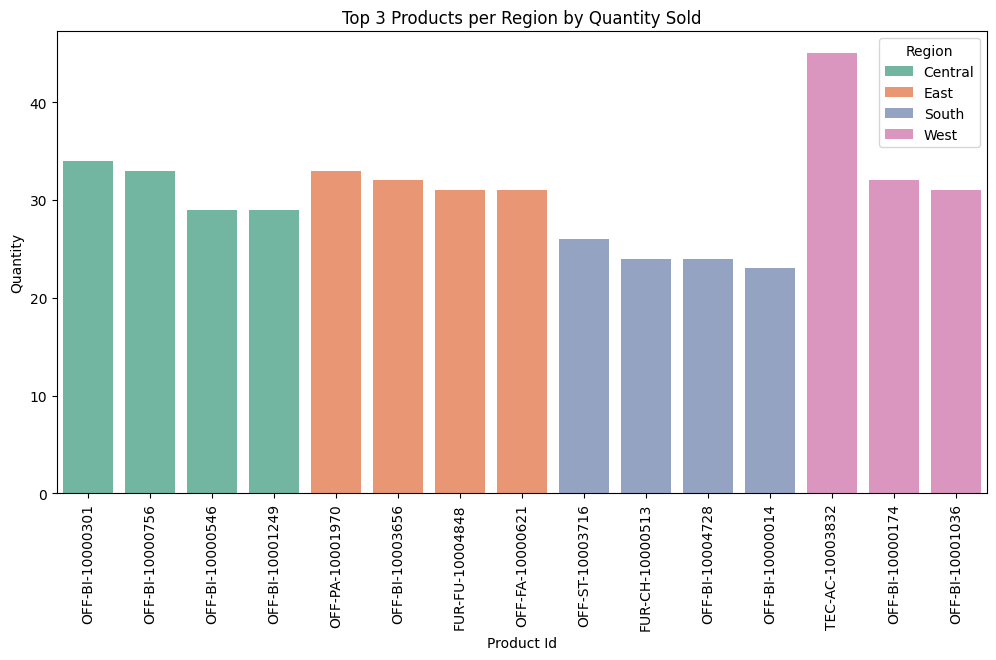

In [115]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Id', y='Quantity', hue='Region', data=top_3_products_per_region, palette='Set2')
plt.xticks(rotation=90)

plt.title('Top 3 Products per Region by Quantity Sold')
plt.xlabel('Product Id')
plt.ylabel('Quantity')

plt.show()

In this region, this product is highly selling, but in this regrion the product is not performing well. So, according to this company can take business driven decision such as giving more offers or discounts, doing more promotions, putting particular product in inventory or faster delivery of product.

#### 10. Total Sales in each Region

In [117]:
Total_sales_region = df1.groupby('Region').sum(['Total_Sale'])['Total_Sale'].reset_index().sort_values(by = ['Total_Sale'], ascending = False)


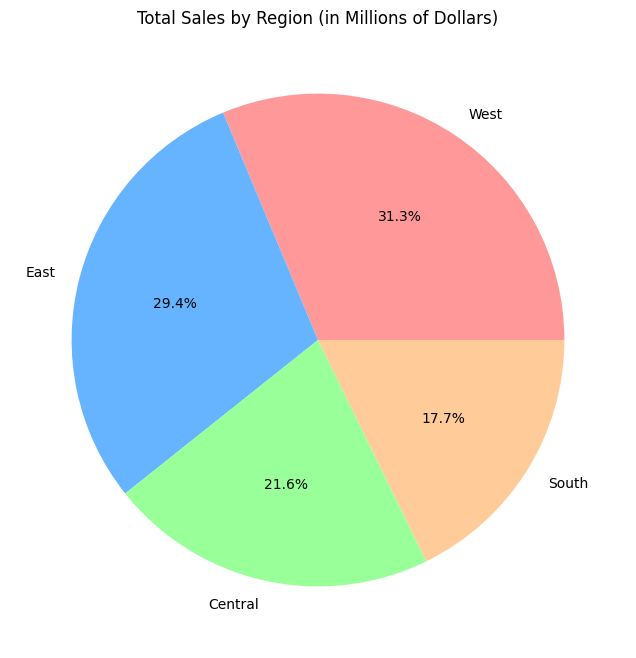

In [118]:
Total_sales_region['Total_Sale_Millions'] = Total_sales_region['Total_Sale'] / 1e6

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(Total_sales_region['Total_Sale_Millions'], labels=Total_sales_region['Region'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# Add a title
plt.title('Total Sales by Region (in Millions of Dollars)')

# Display the plot
plt.show()

In West Region sale is highest, followed by East, Central, and South.

#### 11. Finding top 5 highest selling products in each region according to sales

In [121]:
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale,Month,Quarter,year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,260,2,2,254.8,14.8,29.6,509.6,3,1,2023
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,730,3,3,708.1,108.1,324.3,2124.3,8,3,2023


In [140]:
df1.groupby(['Region', 'Product Id']).sum('Total_Sale')

Order Id  Postal Code  cost price  List Price  \
Region  Product Id                                                       
Central FUR-BO-10000112      3513        60653         760         830   
        FUR-BO-10000362      1595        61604         300         360   
        FUR-BO-10000468      3031        48146         150         190   
        FUR-BO-10000711      5221        48234         200         210   
        FUR-BO-10000780     16297       229596        1980        2330   
...                           ...          ...         ...         ...   
West    TEC-PH-10004896      1088        94601          60          70   
        TEC-PH-10004897      4320        87105          20          20   
        TEC-PH-10004908     38344       421143        1310        1500   
        TEC-PH-10004922     11121       180757         420         480   
        TEC-PH-10004977     11216       262951        1410        1570   

                         Quantity  Discount Percent  Unit_Selling_Price  \
Region  Product Id                                                        
Central FUR-BO-10000112         9                 3               805.1   
        FUR-BO-10000362         3                 3               349.2   
        FUR-BO-10000468         4                 5               180.5   
        FUR-BO-10000711         3                 3               203.7   
        FUR-BO-10000780        17                14              2223.1   
...                           ...               ...                 ...   
West    TEC-PH-10004896         3                 2                68.6   
        TEC-PH-10004897         3                 4                19.2   
        TEC-PH-10004908        22                22              1433.2   
        TEC-PH-10004922         9                 9               459.2   
        TEC-PH-10004977        10                13              1500.9   

                         Unit_Profit  Total Profit  Total_Sale  Month  \
Region  Product Id                                                      
Central FUR-BO-10000112         45.1         405.9      7245.9      4   
        FUR-BO-10000362         49.2         147.6      1047.6      1   
        FUR-BO-10000468         30.5         122.0       722.0      9   
        FUR-BO-10000711          3.7          11.1       611.1      7   
        FUR-BO-10000780        243.1        1503.7     14003.7     16   
...                              ...           ...         ...    ...   
West    TEC-PH-10004896          8.6          25.8       205.8      1   
        TEC-PH-10004897         -0.8          -2.4        57.6     12   
        TEC-PH-10004908        123.2         680.4      7300.4     25   
        TEC-PH-10004922         39.2         199.2      2299.2     17   
        TEC-PH-10004977         90.9         311.2      5101.2     19   

                         Quarter   year  
Region  Product Id                       
Central FUR-BO-10000112        2   2023  
        FUR-BO-10000362        1   2022  
        FUR-BO-10000468        3   2022  
        FUR-BO-10000711        3   2023  
        FUR-BO-10000780        6   6068  
...                          ...    ...  
West    TEC-PH-10004896        1   2022  
        TEC-PH-10004897        4   2023  
        TEC-PH-10004908       10  10114  
        TEC-PH-10004922        6   4044  
        TEC-PH-10004977        8   6067  

[5298 rows x 13 columns]

In [144]:
df1.groupby(['Region', 'Product Id']).sum(['Total_Sale'])['Total_Sale'].reset_index()

,Region,Product Id,Total_Sale
0,Central,FUR-BO-10000112,7245.9
1,Central,FUR-BO-10000362,1047.6
2,Central,FUR-BO-10000468,722.0
3,Central,FUR-BO-10000711,611.1
4,Central,FUR-BO-10000780,14003.7
...,...,...,...
5293,West,TEC-PH-10004896,205.8
5294,West,TEC-PH-10004897,57.6
5295,West,TEC-PH-10004908,7300.4
5296,West,TEC-PH-10004922,2299.2


In [121]:
x = df1.groupby(['Region', 'Product Id']).sum(['Total_Sale'])['Total_Sale'].reset_index()
y = x.sort_values(by = ['Region', 'Total_Sale'], ascending = [True, False])
top_five = y.groupby('Region').head(5).reset_index()
top_five

,index,Region,Product Id,Total_Sale
0,469,Central,OFF-BI-10000545,125827.5
1,1166,Central,TEC-CO-10004722,84875.0
2,1168,Central,TEC-MA-10000822,77509.8
3,488,Central,OFF-BI-10001120,55282.5
4,617,Central,OFF-BI-10004995,42210.0
5,2556,East,TEC-CO-10004722,106421.0
6,2565,East,TEC-MA-10001047,81549.0
7,1342,East,FUR-BO-10004834,66364.2
8,2548,East,TEC-CO-10001449,60948.0
9,1369,East,FUR-CH-10002024,60189.6


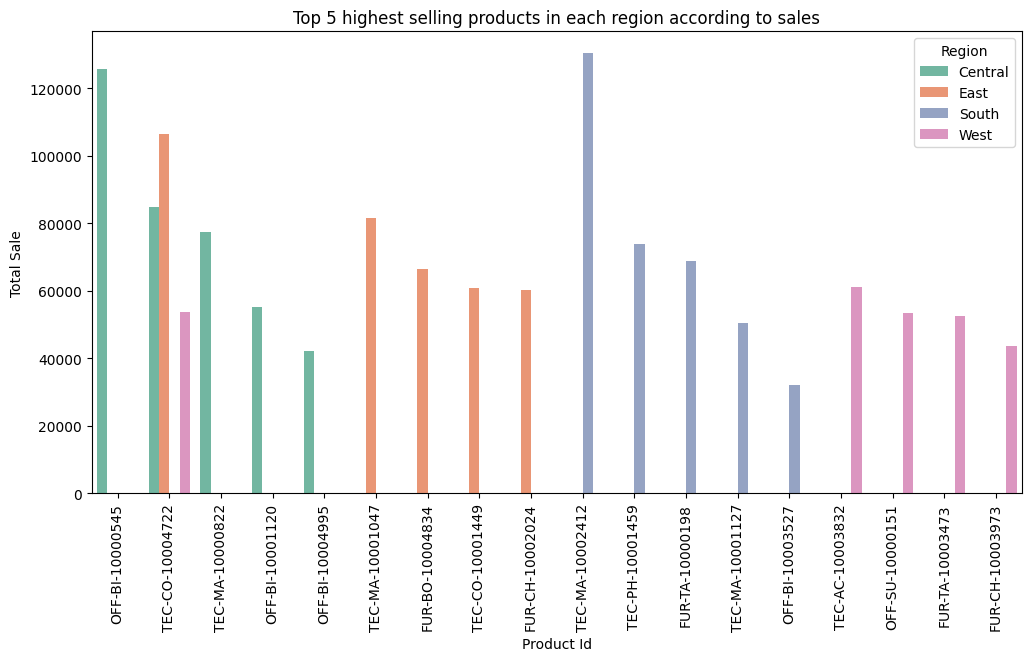

In [122]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Id', y='Total_Sale', hue='Region', data=top_five, palette='Set2')
plt.xticks(rotation=90)

plt.title('Top 5 highest selling products in each region according to sales')
plt.xlabel('Product Id')
plt.ylabel('Total Sale')

plt.show()

#### 12. Finding month over month growth comparison for 2022 and 2023 sales (Jan 2022 vs Jan 2023)

In [123]:
df1.head(2)


,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit,Total_Sale,Month,Quarter,year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,260,2,2,254.8,14.8,29.6,509.6,3,1,2023
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,730,3,3,708.1,108.1,324.3,2124.3,8,3,2023


In [124]:
df1.groupby(['Month', 'year'])

In [125]:
df1.groupby(['Month', 'year']).sum('Total_Sale')['Total_Sale']

Month  year
1      2022    437431.3
       2023    434765.5
2      2022    444011.1
       2023    731638.8
3      2022    394105.2
       2023    393051.9
4      2022    476400.9
       2023    543231.5
5      2022    413625.5
       2023    410707.9
6      2022    465300.3
       2023    328939.0
7      2022    375278.4
       2023    422533.7
8      2022    534562.4
       2023    465010.3
9      2022    433887.0
       2023    420620.5
10     2022    601707.8
       2023    626498.3
11     2022    451809.6
       2023    334940.6
12     2022    447421.8
       2023    491848.9
Name: Total_Sale, dtype: float64

In [126]:
a = df1.groupby(['Month', 'year']).sum('Total_Sale')['Total_Sale'].reset_index()
a

,Month,year,Total_Sale
0,1,2022,437431.3
1,1,2023,434765.5
2,2,2022,444011.1
3,2,2023,731638.8
4,3,2022,394105.2
5,3,2023,393051.9
6,4,2022,476400.9
7,4,2023,543231.5
8,5,2022,413625.5
9,5,2023,410707.9


In [127]:
pivot_table = a.pivot_table(index = 'Month', columns='year', values='Total_Sale', aggfunc='sum')
pivot_table

year,2022,2023
Month,,
1,437431.3,434765.5
2,444011.1,731638.8
3,394105.2,393051.9
4,476400.9,543231.5
5,413625.5,410707.9
6,465300.3,328939.0
7,375278.4,422533.7
8,534562.4,465010.3
9,433887.0,420620.5


In [128]:
pivot_table = pivot_table.reset_index()
pivot_table

year,Month,2022,2023
0,1,437431.3,434765.5
1,2,444011.1,731638.8
2,3,394105.2,393051.9
3,4,476400.9,543231.5
4,5,413625.5,410707.9
5,6,465300.3,328939.0
6,7,375278.4,422533.7
7,8,534562.4,465010.3
8,9,433887.0,420620.5
9,10,601707.8,626498.3


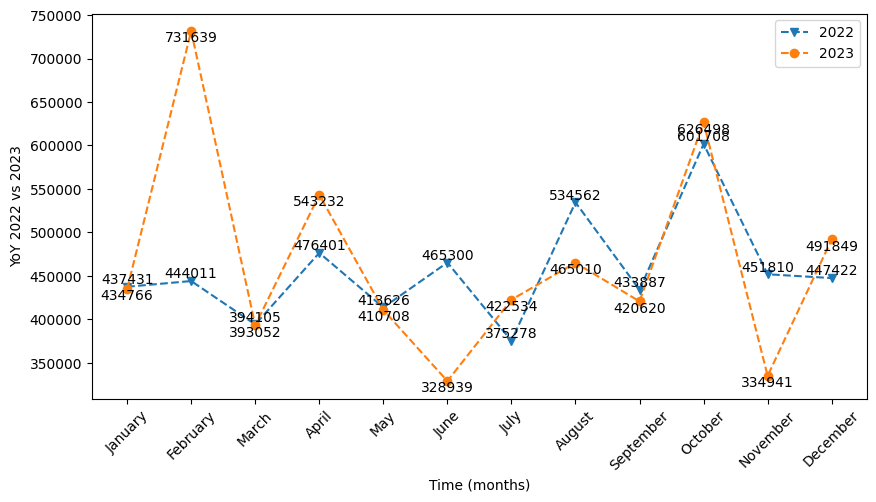

In [136]:
fig, ax = plt.subplots()
fig.set_size_inches([10, 5])

month_names = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

ax.plot(pivot_table["Month"], pivot_table[2022], marker="v", linestyle="--", label="2022")
ax.plot(pivot_table["Month"], pivot_table[2023], marker="o", linestyle="--", label="2023")

ax.set_xticks(pivot_table["Month"])
ax.set_xticklabels(month_names, rotation=45)

for i, txt in enumerate(pivot_table[2022]):
    ax.text(pivot_table["Month"][i], pivot_table[2022][i], f'{txt:.0f}', ha='center', va='bottom')

for i, txt in enumerate(pivot_table[2023]):
    ax.text(pivot_table["Month"][i], pivot_table[2023][i], f'{txt:.0f}', ha='center', va='top')

ax.set_xlabel("Time (months)")
ax.set_ylabel("YoY 2022 vs 2023")

ax.legend()

plt.show()

In [157]:
pivot_table['YoY_growth'] = pivot_table[2022] - pivot_table[2023]
pivot_table

year,Month,2022,2023,YoY_growth
0,1,437431.3,434765.5,2665.8
1,2,444011.1,731638.8,-287627.7
2,3,394105.2,393051.9,1053.3
3,4,476400.9,543231.5,-66830.6
4,5,413625.5,410707.9,2917.6
5,6,465300.3,328939.0,136361.3
6,7,375278.4,422533.7,-47255.3
7,8,534562.4,465010.3,69552.1
8,9,433887.0,420620.5,13266.5
9,10,601707.8,626498.3,-24790.5


In [158]:
pivot_table['YoY_growth_percentage'] = (pivot_table['YoY_growth'] / pivot_table[2022]) * 100
print(pivot_table)

year  Month      2022      2023  YoY_growth  YoY_growth_percentage
0         1  437431.3  434765.5      2665.8               0.609421
1         2  444011.1  731638.8   -287627.7             -64.779394
2         3  394105.2  393051.9      1053.3               0.267264
3         4  476400.9  543231.5    -66830.6             -14.028227
4         5  413625.5  410707.9      2917.6               0.705372
5         6  465300.3  328939.0    136361.3              29.306085
6         7  375278.4  422533.7    -47255.3             -12.592065
7         8  534562.4  465010.3     69552.1              13.011035
8         9  433887.0  420620.5     13266.5               3.057593
9        10  601707.8  626498.3    -24790.5              -4.120023
10       11  451809.6  334940.6    116869.0              25.866870
11       12  447421.8  491848.9    -44427.1              -9.929579


In [159]:
pivot_table

year,Month,2022,2023,YoY_growth,YoY_growth_percentage
0,1,437431.3,434765.5,2665.8,0.609421
1,2,444011.1,731638.8,-287627.7,-64.779394
2,3,394105.2,393051.9,1053.3,0.267264
3,4,476400.9,543231.5,-66830.6,-14.028227
4,5,413625.5,410707.9,2917.6,0.705372
5,6,465300.3,328939.0,136361.3,29.306085
6,7,375278.4,422533.7,-47255.3,-12.592065
7,8,534562.4,465010.3,69552.1,13.011035
8,9,433887.0,420620.5,13266.5,3.057593
9,10,601707.8,626498.3,-24790.5,-4.120023


## Reading data from SQL Server in Python

In [163]:
# Windows

import pyodbc

cnxn = pyodbc.connect(
    r'Driver={ODBC Driver 17 FOR SQL Server};' # search for ODBC (32 or 64 bit) from start menu
    r'Server=ROKKO_THE_GAMER;'
    r'Trusted_Connection=yes;'
    r'Database=Project;'
)



In [164]:
df = pd.read_sql_query('select * from orders_data', cnxn)
df.head()

C:\Users\Saurabh Kamal\AppData\Local\Temp\ipykernel_2932\1084758224.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('select * from orders_data', cnxn)


,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8,14.8,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1,108.1,324.3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,9.5,-0.5,-1.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,940.8,160.8,804.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,19.0,-1.0,-2.0


In [165]:
df.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit,Total Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8,14.8,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1,108.1,324.3
